<center><b>Credit Card Fraud Detection</b><center>


<b>Importing commonly used libraries for Data Analysis <b>

In [1]:
#Libraries used are Pandas,Numpy,Matplotlib,Scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable 

<b>Importing the card_transdata Dataset provided and print the Dataframe<b>

In [2]:
dframe=pd.read_csv("/kaggle/input/credit-card-fraud/card_transdata.csv")
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


<b>Print the top 5 rows<b>

In [3]:
dframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<b>Finding the essential statistics of each feature using describe function<b>

In [4]:
dframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<b>No Outlier detection done, because the values will have an effect on the target variable (fraud)<b>

<b>Checking Null Values<b>

In [5]:
dframe.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<b>Value counts for Categorical varaibles (repeat_retailer, used_chip, used_pin_number, online_order and fraud<b>

In [6]:
for column in dframe.columns[3:9]:
    print(dframe[column].value_counts())
    print()


1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

1.0    650552
0.0    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



<b>Correlation matrix between features<b>

<AxesSubplot:>

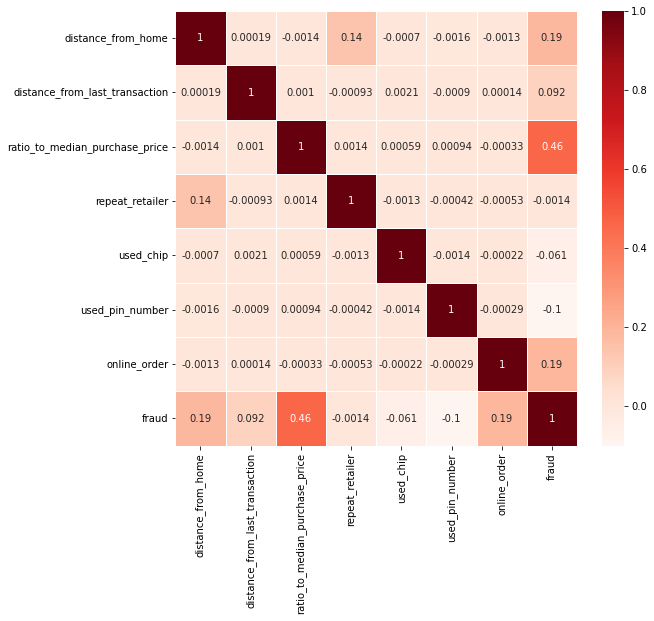

In [7]:
correlation_mat = dframe.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

<b>Two Feature Analysis - (Fraud, other_categorical_variables) in x axis and number of records in y axis<b>

Text(0, 0.5, 'number of records')

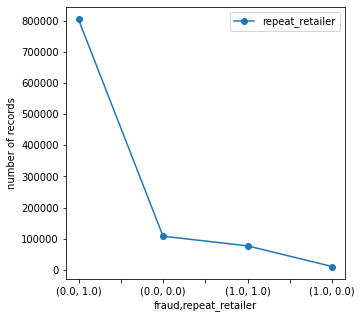

In [8]:
#Fraud - repeat_retailer
fig, ax = plt.subplots(figsize=(5,5))
dframe.groupby('fraud')['repeat_retailer'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")

Text(0, 0.5, 'number of records')

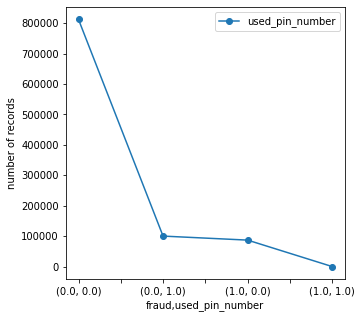

In [9]:
#Fraud - used_pin_number
fig, ax = plt.subplots(figsize=(5,5))
dframe.groupby('fraud')['used_pin_number'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")

Text(0, 0.5, 'number of records')

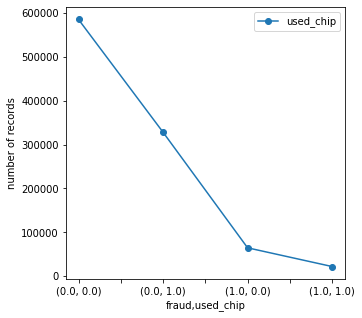

In [10]:
#Fraud - used_chip
fig, ax = plt.subplots(figsize=(5,5))
dframe.groupby('fraud')['used_chip'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")

Text(0, 0.5, 'number of records')

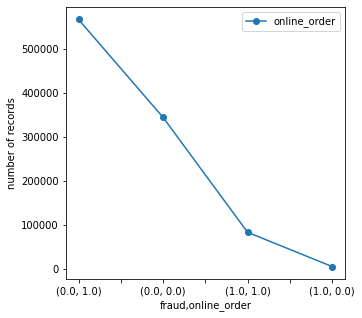

In [11]:
#Fraud - online_order
fig, ax = plt.subplots(figsize=(5,5))
dframe.groupby('fraud')['online_order'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")

<b>Defining a Function for Train and Test split - split is done on 80% train and 20% test. Initially done including all features.<b>

In [12]:
def declare_train_and_test(fn, target_col, cols, delim=",", normalize=True):
    target = [cols[target_col]]
    print ("Target Feature :", target)
    features = cols[0:target_col]
    features += cols[target_col+1:]
    print ("Features column :", features)
    
    df = pd.read_csv(fn, cols, delimiter=delim, delim_whitespace=False)
    df.fillna(value=0,inplace=True)
    x_df = df[features]
    y_df = df[target]
    x_data = np.array(pd.DataFrame(x_df, columns = features))
    y_data = np.array(pd.DataFrame(y_df, columns = target))
      

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
    print (x_train.shape)
    return x_train, y_train, x_test, y_test

column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"
]
x_train, y_train, x_test, y_test =declare_train_and_test("/kaggle/input/credit-card-fraud/card_transdata.csv",7,cols=column_names)
print(x_train,y_train)

Target Feature : ['fraud']
Features column : ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
(800000, 7)
[[57.87785658  0.31114001  1.94593998 ...  1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          0.
   1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783  ...  0.          0.
   1.        ]
 [12.61886867  3.82897591  1.87159267 ...  0.          0.
   1.        ]
 [ 2.10108365 10.51833128  0.53783513 ...  0.          0.
   1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


<b>Univariate Analysis is carried out with Trained data and removing the feature which has least effect on target variable (fraud)<b>

In [13]:
#Univariate Analysis
Univ_Analysis = SelectKBest(score_func=f_classif, k=7)
fit = Univ_Analysis.fit(x_train, y_train)
newcols = Univ_Analysis.get_support(indices=True)
for i in range(7):
    print ("Feature_Name = ",column_names[i], ", Score", fit.scores_[i])

Feature_Name =  distance_from_home , Score 29240.090241162135
Feature_Name =  distance_from_last_transaction , Score 6725.830204005158
Feature_Name =  ratio_to_median_purchase_price , Score 216715.511150545
Feature_Name =  repeat_retailer , Score 3.089590031652224
Feature_Name =  used_chip , Score 3009.546178694389
Feature_Name =  used_pin_number , Score 8158.329635532468
Feature_Name =  online_order , Score 30671.11168858843


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b>Since we have least score for repeat_retailer, we exclude that from our analysis. And split the train and test data once again<b>

In [14]:
column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","used_chip","used_pin_number","online_order","fraud"
]
x_train, y_train, x_test, y_test =declare_train_and_test("/kaggle/input/credit-card-fraud/card_transdata.csv",6,cols=column_names)
print(x_train,y_train)

Target Feature : ['fraud']
Features column : ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number', 'online_order']
(800000, 6)
[[57.87785658  0.31114001  1.94593998  1.          0.          0.        ]
 [10.8299427   0.1755915   1.29421881  0.          0.          0.        ]
 [ 5.09107949  0.80515259  0.42771456  0.          0.          1.        ]
 ...
 [ 7.29333654  0.9949192   0.6795783   0.          0.          1.        ]
 [12.61886867  3.82897591  1.87159267  0.          0.          1.        ]
 [ 2.10108365 10.51833128  0.53783513  0.          0.          1.        ]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


<b>Classification done through Decision Tree model initially, with the train and test data<b>

In [15]:
# Decision Tree model
des_tree_model = DecisionTreeClassifier()
drawing= des_tree_model.fit(x_train, y_train)
y_test_pred = des_tree_model.predict(x_test)
y_train_pred = des_tree_model.predict(x_train)
Accuracy_Test=accuracy_score(y_test, y_test_pred) * 100
Accuracy_Test= str(Accuracy_Test) + " %"
Accuracy_Train=accuracy_score(y_train, y_train_pred) * 100
Accuracy_Train= str(Accuracy_Train) + " %"
Train_Data_Score=des_tree_model.score(x_train, y_train) * 100
Train_Data_Score= str(Train_Data_Score) + " %"


#Construction of confusion matrix
confmat_train = confusion_matrix(y_train_pred, y_train)
confmat_test =  confusion_matrix(y_test_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))


#Calculation of Specificity
#Specificity = TN/(TN+FP)
sp = confmat_test[1,1]/(confmat_test[1,0]+confmat_test[1,1]) * 100
sp= str(sp) + " %"


#Calculation of sensitivity
#Sensitivity= TP/(TP+FN)
sensi = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
sensi= str(sensi) + " %"



myTable = PrettyTable(["Peformance Paramters", "Value"]) 
#Insert rows
myTable.add_row(["Accuracy of Test Data",Accuracy_Test]) 
myTable.add_row(["Accuracy of Train Data", Accuracy_Train]) 
myTable.add_row(["Data score of Train Data",Train_Data_Score]) 
myTable.add_row(["Specificity of the confusion matrix",sp]) 
myTable.add_row(["Sensitivity of the confusion matrix",sensi])

#print Output
print(myTable)


Confusion matrix of Train Data
 [[730098      0]
 [     0  69902]]

Confusion matrix of Test Data
 [[182499      1]
 [     0  17500]]
+-------------------------------------+---------------------+
|         Peformance Paramters        |        Value        |
+-------------------------------------+---------------------+
|        Accuracy of Test Data        |      99.9995 %      |
|        Accuracy of Train Data       |       100.0 %       |
|       Data score of Train Data      |       100.0 %       |
| Specificity of the confusion matrix |       100.0 %       |
| Sensitivity of the confusion matrix | 99.99945205479452 % |
+-------------------------------------+---------------------+


<b> Confusion Matrix plot function is created for the Decision Tree and it is used for various classification models by calling the same.<b>

In [16]:
# Confusion matrix of the Decision Tree
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_confusionmat(cm, lab, test_or_train):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    f = ax.matshow(cm, cmap=plt.cm.turbo)
    plt.title('Confusion Matrix of the ' + test_or_train +' Decision Tree \n')
    fig.colorbar(f)
    ax.set_xticklabels([''] + lab)
    ax.set_yticklabels([''] + lab)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    s = [['TP','FN'], ['FP', 'TN']]
    for k in range(2):
        for l in range(2):
            plt.text(l,k, str(cm[k][l]))
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


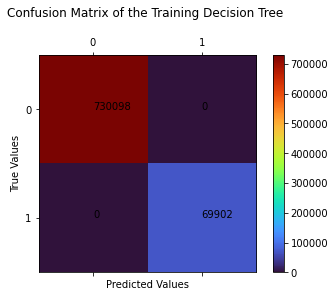

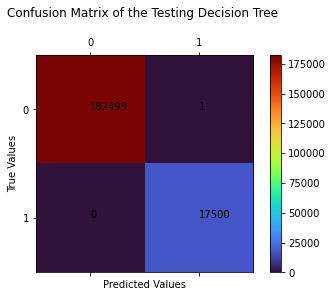

In [17]:
plot_confusionmat(confmat_train, ["0","1"], "Training")
plot_confusionmat(confmat_test, ["0","1"], "Testing")

<b> Plotting the Precision-Recall Curve for Decision Tree<b>

ROC-AUC of Decision Tree =1.000
Precision:  [0.087505 1.       1.      ]
Recall:  [1.         0.99994286 0.        ]


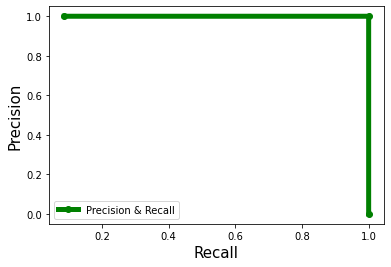

In [18]:
# Area under the precision and recall curve - plot

#No skill prediction
no_skill_prob = [0 for _ in range(len(y_test))]

#Predict the probability
lr_prob = des_tree_model.predict_proba(x_test)
#Positive outcome condition
lr_prob = lr_prob[:, 1]

#Calculation of Auc Score
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
lr_auc = roc_auc_score(y_test, lr_prob)
print('ROC-AUC of Decision Tree =%.3f' % (lr_auc))

#Calculate and construct the precision and recall curve
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
Precision, Recall, _ = precision_recall_curve(y_test, lr_prob)
print("Precision: ", Precision)
print("Recall: ", Recall)

#ROC Curve
plt.plot(Precision, Recall, marker='o', label='Precision & Recall',color='green',linewidth=5)
plt.xlabel('Recall',fontsize='15')
plt.ylabel('Precision',fontsize='15')
plt.legend()
plt.show()

<b>Decision Tree Drawing <b>

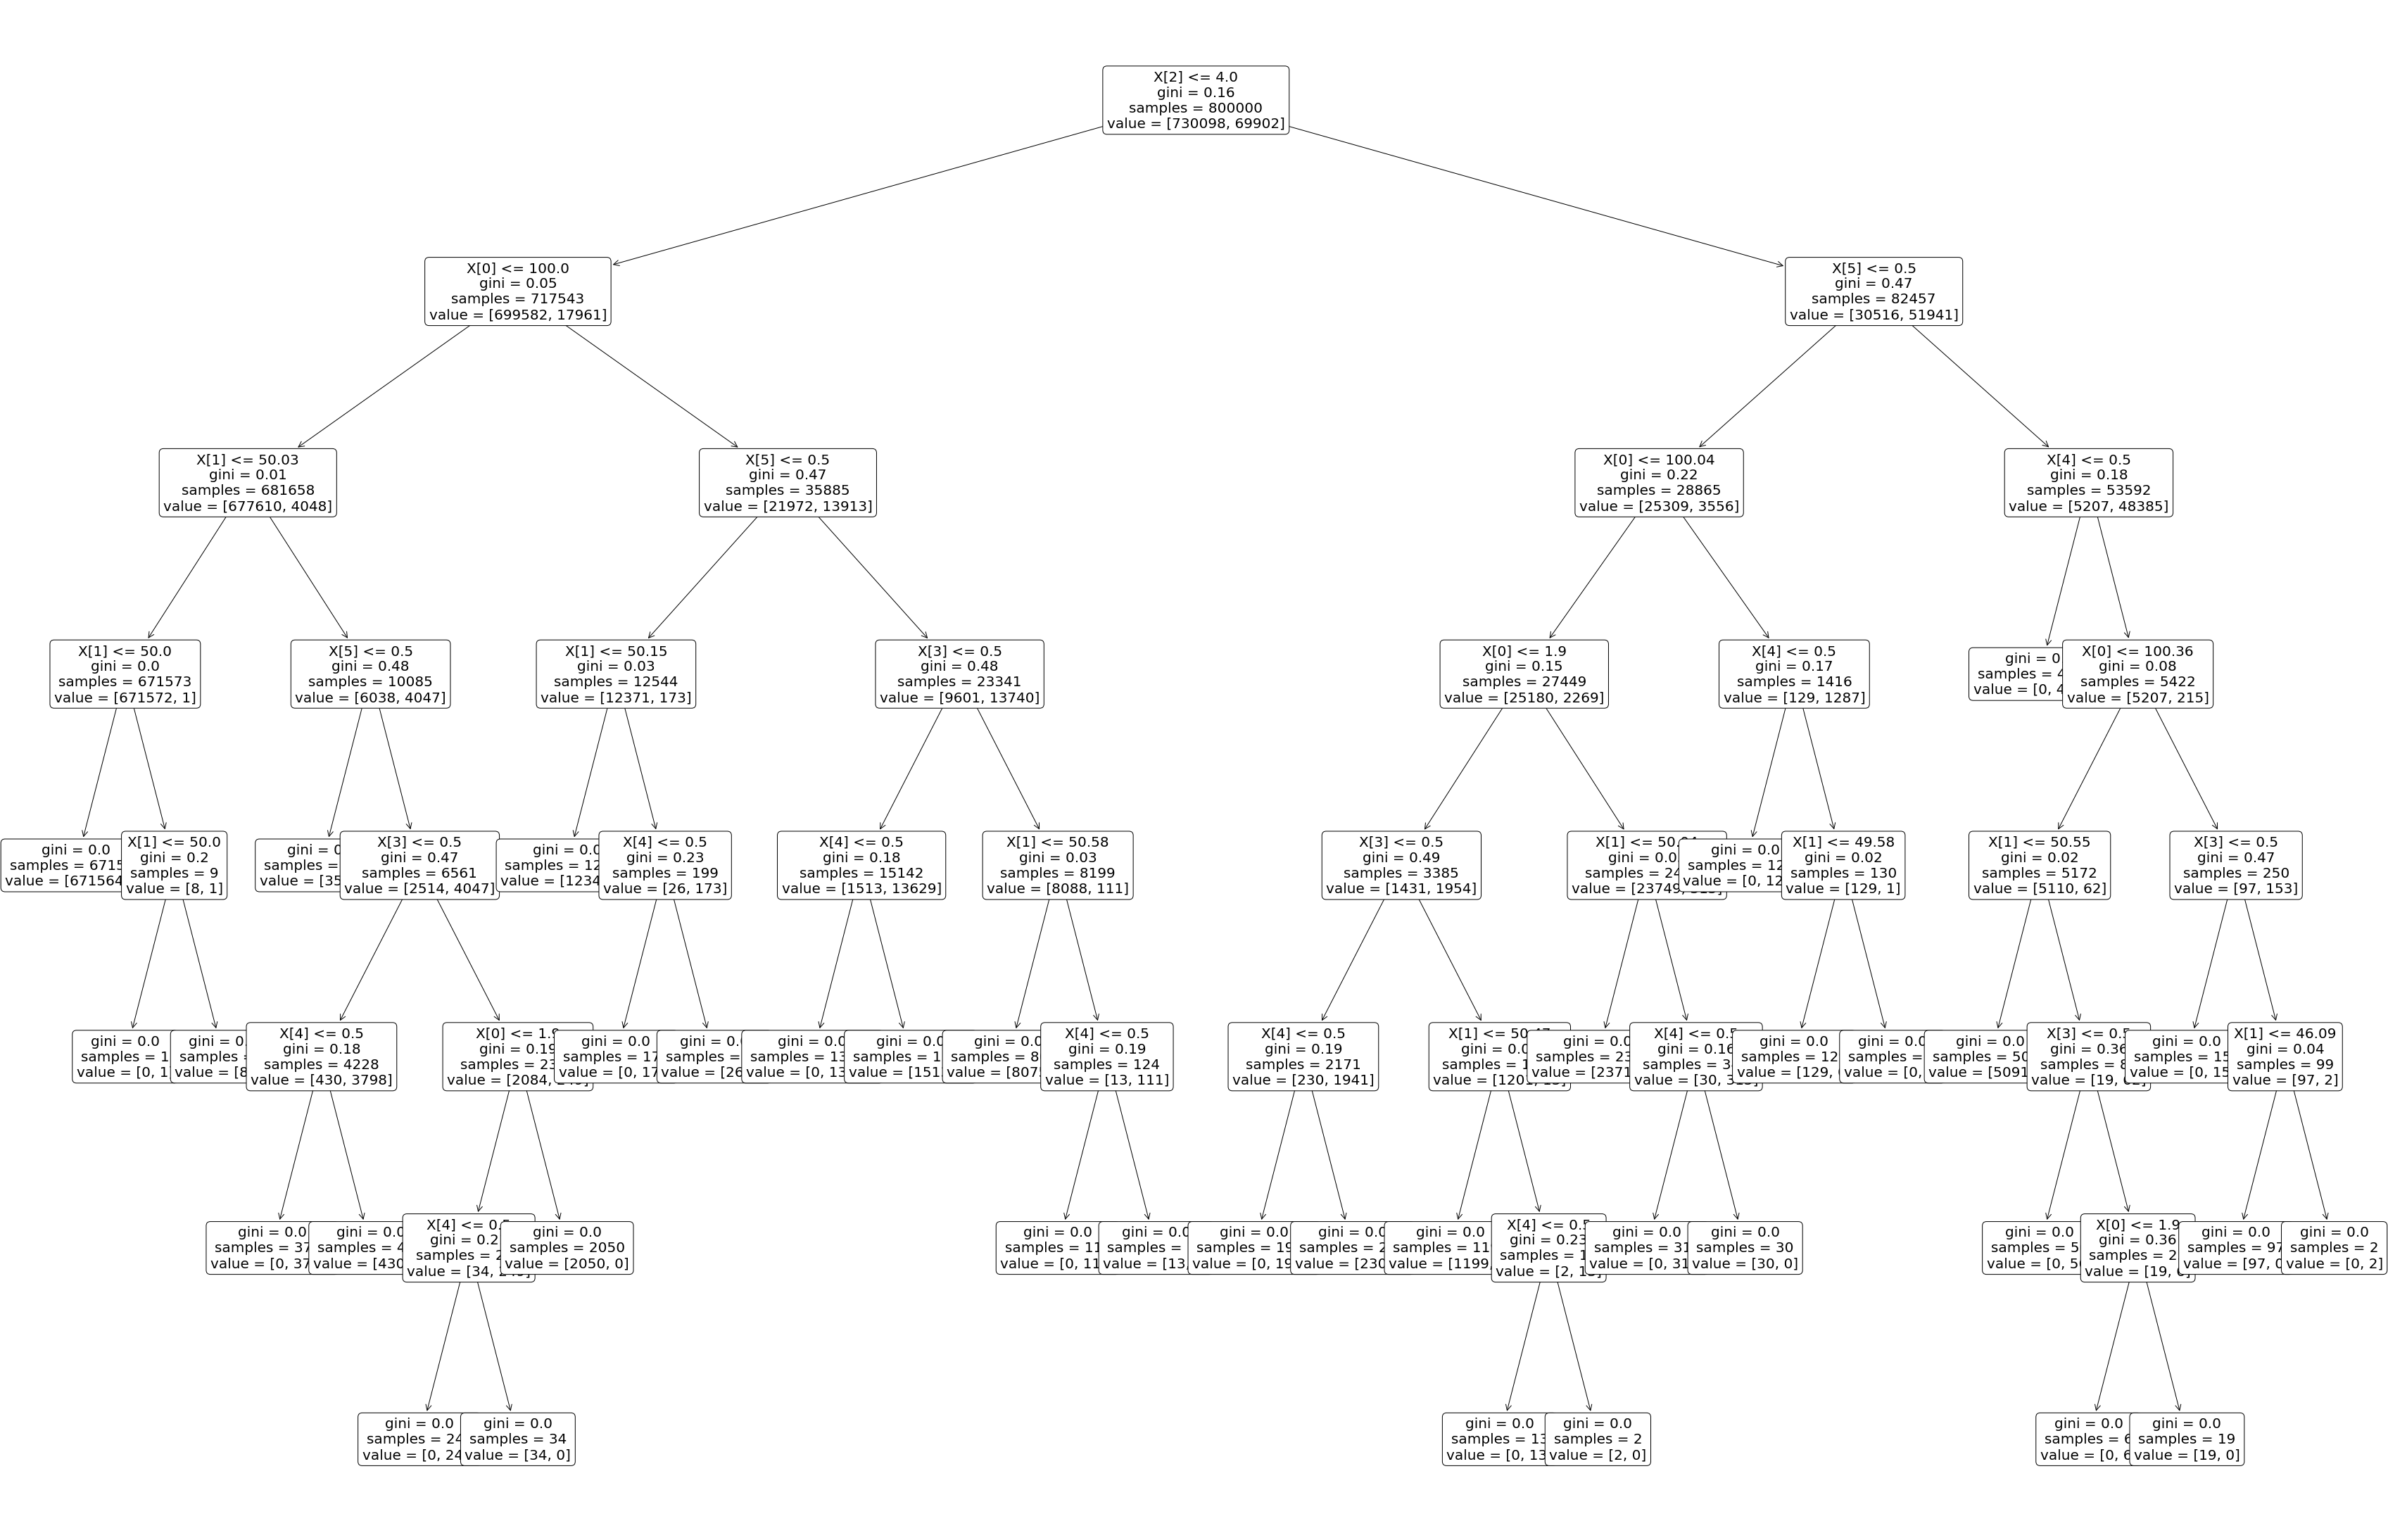

In [19]:
#Decision Tree Drawing :
plt.figure(figsize=[60,40])
tree.plot_tree(des_tree_model,fontsize=20, rounded=True,impurity=True, precision=2)
#tree.plot_tree(drawing,fontsize=20, rounded=True,impurity=True, precision=2)
plt.show()

<b>Classification done through Naive Bayes model with the train and test data<b>

In [20]:
# Naive Bayes Model 
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_test_pred = nb_model.predict(x_test)
y_train_pred = nb_model.predict(x_train)
Accuracy_Test=accuracy_score(y_test, y_test_pred) * 100
Accuracy_Test= str(Accuracy_Test) + " %"
Accuracy_Train=accuracy_score(y_train, y_train_pred) * 100
Accuracy_Train= str(Accuracy_Train) + " %"
Train_Data_Score=nb_model.score(x_train, y_train) * 100
Train_Data_Score= str(Train_Data_Score) + " %"

#Confusion matrix construction
confmat_train = confusion_matrix(y_train_pred, y_train)
confmat_test =  confusion_matrix(y_test_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))

#Calculation of Specificity
#Specificity = TN/(TN+FP)
sp = confmat_test[1,1]/(confmat_test[1,0]+confmat_test[1,1]) * 100
sp= str(sp) + " %"


#Calculation of sensitivity
#Sensitivity= TP/(TP+FN)
sensi = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
sensi= str(sensi) + " %"



myTable = PrettyTable(["Peformance Paramters", "Value"]) 
#Insert rows
myTable.add_row(["Accuracy of Test Data",Accuracy_Test]) 
myTable.add_row(["Accuracy of Train Data", Accuracy_Train]) 
myTable.add_row(["Data score of Train Data",Train_Data_Score]) 
myTable.add_row(["Specificity of the confusion matrix",sp]) 
myTable.add_row(["Sensitivity of the confusion matrix",sensi]) 

#print Output
print(myTable)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Confusion matrix of Train Data
 [[718909  28401]
 [ 11189  41501]]

Confusion matrix of Test Data
 [[179688   7128]
 [  2811  10373]]
+-------------------------------------+---------------------+
|         Peformance Paramters        |        Value        |
+-------------------------------------+---------------------+
|        Accuracy of Test Data        | 95.03049999999999 % |
|        Accuracy of Train Data       |      95.05125 %     |
|       Data score of Train Data      |      95.05125 %     |
| Specificity of the confusion matrix | 78.67870145631069 % |
| Sensitivity of the confusion matrix | 96.18448098663926 % |
+-------------------------------------+---------------------+


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


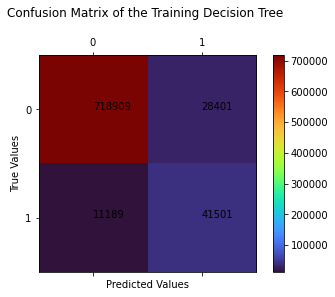

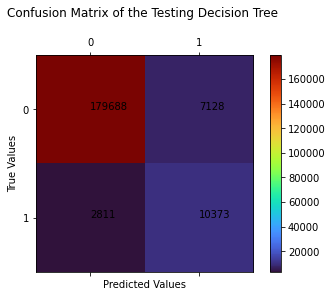

In [21]:
#calling plot_confusionmat function
plot_confusionmat(confmat_train, ["0","1"], "Training")
plot_confusionmat(confmat_test, ["0","1"], "Testing")

ROC-AUC of Naive Bayes =0.964
Precision:  [0.09645507 0.09645009 0.09645062 ... 0.6231454  0.62258544 1.        ]
Recall:  [1.         0.99994286 0.99994286 ... 0.04799726 0.04788298 0.        ]


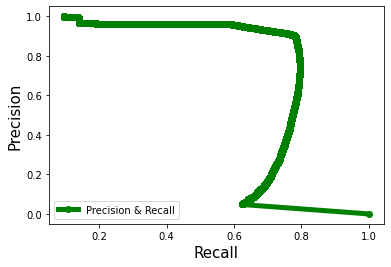

In [22]:
# Area under the precision and recall curve - plot

#No skill prediction
no_skill_prob = [0 for _ in range(len(y_test))]

#Predict the probability
nb_prob = nb_model.predict_proba(x_test)
#Positive outcome condition
nb_prob = nb_prob[:, 1]

#Calculation of Auc Score
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
nb_auc = roc_auc_score(y_test, nb_prob)
print('ROC-AUC of Naive Bayes =%.3f' % (nb_auc))

Precision, Recall, _ = precision_recall_curve(y_test, nb_prob)
print("Precision: ", Precision)
print("Recall: ", Recall)

#ROC Curve
plt.plot(Precision, Recall, marker='o', label='Precision & Recall',color='green',linewidth=5)
plt.xlabel('Recall',fontsize='15')
plt.ylabel('Precision',fontsize='15')
plt.legend()
plt.show()


<b>Classification done through Logistic Regression model with the train and test data<b>

In [23]:
#Logistic Regression Model
log_reg_model = LogisticRegression(fit_intercept = True, C = 1e16,  solver = "liblinear")
log_reg_model.fit(x_train, y_train)
y_test_pred = log_reg_model.predict(x_test)
y_train_pred = log_reg_model.predict(x_train)
Lr_Accuracy_Test=accuracy_score(y_test, y_test_pred) * 100
Lr_Accuracy_Test= str(Lr_Accuracy_Test) + " %"
Lr_Accuracy_Train=accuracy_score(y_train, y_train_pred) * 100
Lr_Accuracy_Train= str(Lr_Accuracy_Train) + " %"
Lr_Train_Data_Score=log_reg_model.score(x_train, y_train) * 100
Lr_Train_Data_Score= str(Lr_Train_Data_Score) + " %"

#Confusion matrix construction
confmat_train = confusion_matrix(y_train_pred, y_train)
confmat_test =  confusion_matrix(y_test_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))

#Calculation of Specificity
#Specificity = TN/(TN+FP)
sp = confmat_test[1,1]/(confmat_test[1,0]+confmat_test[1,1]) * 100
sp= str(sp) + " %"


#Calculation of sensitivity
#Sensitivity= TP/(TP+FN)
sensi = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
sensi= str(sensi) + " %"



myTable = PrettyTable(["Peformance Paramters", "Value"]) 
#Insert rows
myTable.add_row(["Accuracy of Test Data",Lr_Accuracy_Test]) 
myTable.add_row(["Accuracy of Train Data", Lr_Accuracy_Train]) 
myTable.add_row(["Data score of Train Data",Lr_Train_Data_Score]) 
myTable.add_row(["Specificity of the confusion matrix",sp]) 
myTable.add_row(["Sensitivity of the confusion matrix",sensi]) 

#print Output
print(myTable)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Confusion matrix of Train Data
 [[724987  28010]
 [  5111  41892]]

Confusion matrix of Test Data
 [[181213   7028]
 [  1286  10473]]
+-------------------------------------+---------------------+
|         Peformance Paramters        |        Value        |
+-------------------------------------+---------------------+
|        Accuracy of Test Data        |       95.843 %      |
|        Accuracy of Train Data       |     95.859875 %     |
|       Data score of Train Data      |     95.859875 %     |
| Specificity of the confusion matrix | 89.06369589250787 % |
| Sensitivity of the confusion matrix | 96.26648817207727 % |
+-------------------------------------+---------------------+


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


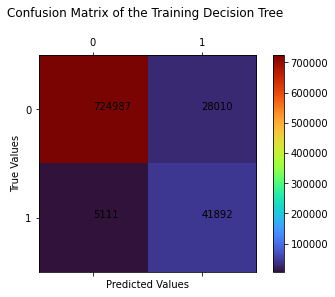

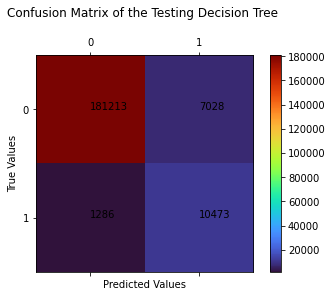

In [24]:
#calling plot_confusionmat function
plot_confusionmat(confmat_train, ["0","1"], "Training")
plot_confusionmat(confmat_test, ["0","1"], "Testing")

ROC-AUC of Logistic Regression=0.966
Precision:  [0.09673497 0.09672997 0.09673051 ... 0.75609756 0.73684211 1.        ]
Recall:  [1.         0.99994286 0.99994286 ... 0.00177133 0.00159991 0.        ]


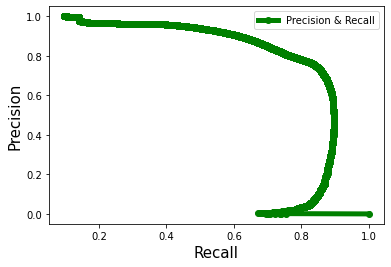

In [25]:
# Area under the precision and recall curve - plot
#No skill prediction
no_skill_prob = [0 for _ in range(len(y_test))]

#Predict the probability
log_reg_prob = log_reg_model.predict_proba(x_test)

#Positive outcome condition
log_reg_prob = log_reg_prob[:, 1]

#Calculation of Auc Score
ns_auc = roc_auc_score(y_test, no_skill_prob)
log_reg_auc = roc_auc_score(y_test, log_reg_prob)
print('ROC-AUC of Logistic Regression=%.3f' % (log_reg_auc))

# calculate Precison Recall curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)
Precision, Recall, _ = precision_recall_curve(y_test, log_reg_prob)

print("Precision: ", Precision)
print("Recall: ", Recall)


#ROC Curve
plt.plot(Precision, Recall, marker='o', label='Precision & Recall',color='green',linewidth=5)
plt.xlabel('Recall',fontsize='15')
plt.ylabel('Precision',fontsize='15')
plt.legend()
plt.show()


<b>Classification done through Random Forest model with the train and test data<b>

In [26]:
# Random Forest model
r_forest_model =RandomForestClassifier(n_estimators =30, random_state = 21)
r_forest_model.fit(x_train, y_train)
y_test_pred = r_forest_model.predict(x_test)
y_train_pred = r_forest_model.predict(x_train)
Rf_Accuracy_Test=accuracy_score(y_test, y_test_pred) * 100
Rf_Accuracy_Test= str(Rf_Accuracy_Test) + " %"
Rf_Accuracy_Train=accuracy_score(y_train, y_train_pred) * 100
Rf_Accuracy_Train= str(Rf_Accuracy_Train) + " %"
Rf_Train_Data_Score=r_forest_model.score(x_train, y_train) * 100
Rf_Train_Data_Score= str(Rf_Train_Data_Score) + " %"

#Construction of confusion matrix
confmat_train = confusion_matrix(y_train_pred, y_train)
confmat_test =  confusion_matrix(y_test_pred, y_test)
print ("\nConfusion matrix of Train Data\n", confmat_train)
print ("\nConfusion matrix of Test Data\n", confmat_test)
total=sum(sum(confmat_test))

#Calculation of Specificity
#Specificity = TN/(TN+FP)
sp = confmat_test[1,1]/(confmat_test[1,0]+confmat_test[1,1]) * 100
sp= str(sp) + " %"


#Calculation of sensitivity
#Sensitivity= TP/(TP+FN)
sensi = confmat_test[0,0]/(confmat_test[0,0]+confmat_test[0,1]) * 100
sensi= str(sensi) + " %"

#Table creation
myTable = PrettyTable(["Peformance Paramters", "Value"]) 
#Insert rows
myTable.add_row(["Accuracy of Test Data",Rf_Accuracy_Test]) 
myTable.add_row(["Accuracy of Train Data", Rf_Accuracy_Train]) 
myTable.add_row(["Data score of Train Data",Rf_Train_Data_Score]) 
myTable.add_row(["Specificity of the confusion matrix",sp]) 
myTable.add_row(["Sensitivity of the confusion matrix",sensi]) 

#print Output
print(myTable)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix of Train Data
 [[730098      0]
 [     0  69902]]

Confusion matrix of Test Data
 [[182499      2]
 [     0  17499]]
+-------------------------------------+---------------------+
|         Peformance Paramters        |        Value        |
+-------------------------------------+---------------------+
|        Accuracy of Test Data        | 99.99900000000001 % |
|        Accuracy of Train Data       |       100.0 %       |
|       Data score of Train Data      |       100.0 %       |
| Specificity of the confusion matrix |       100.0 %       |
| Sensitivity of the confusion matrix | 99.99890411559389 % |
+-------------------------------------+---------------------+


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


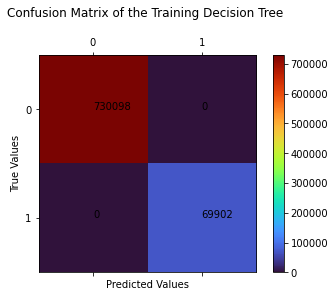

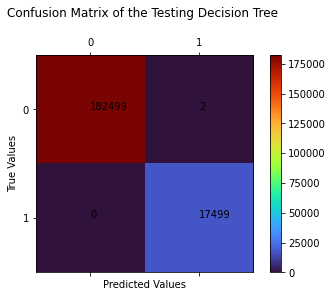

In [27]:
#calling plot_confusionmat function
plot_confusionmat(confmat_train, ["0","1"], "Training")
plot_confusionmat(confmat_test, ["0","1"], "Testing")

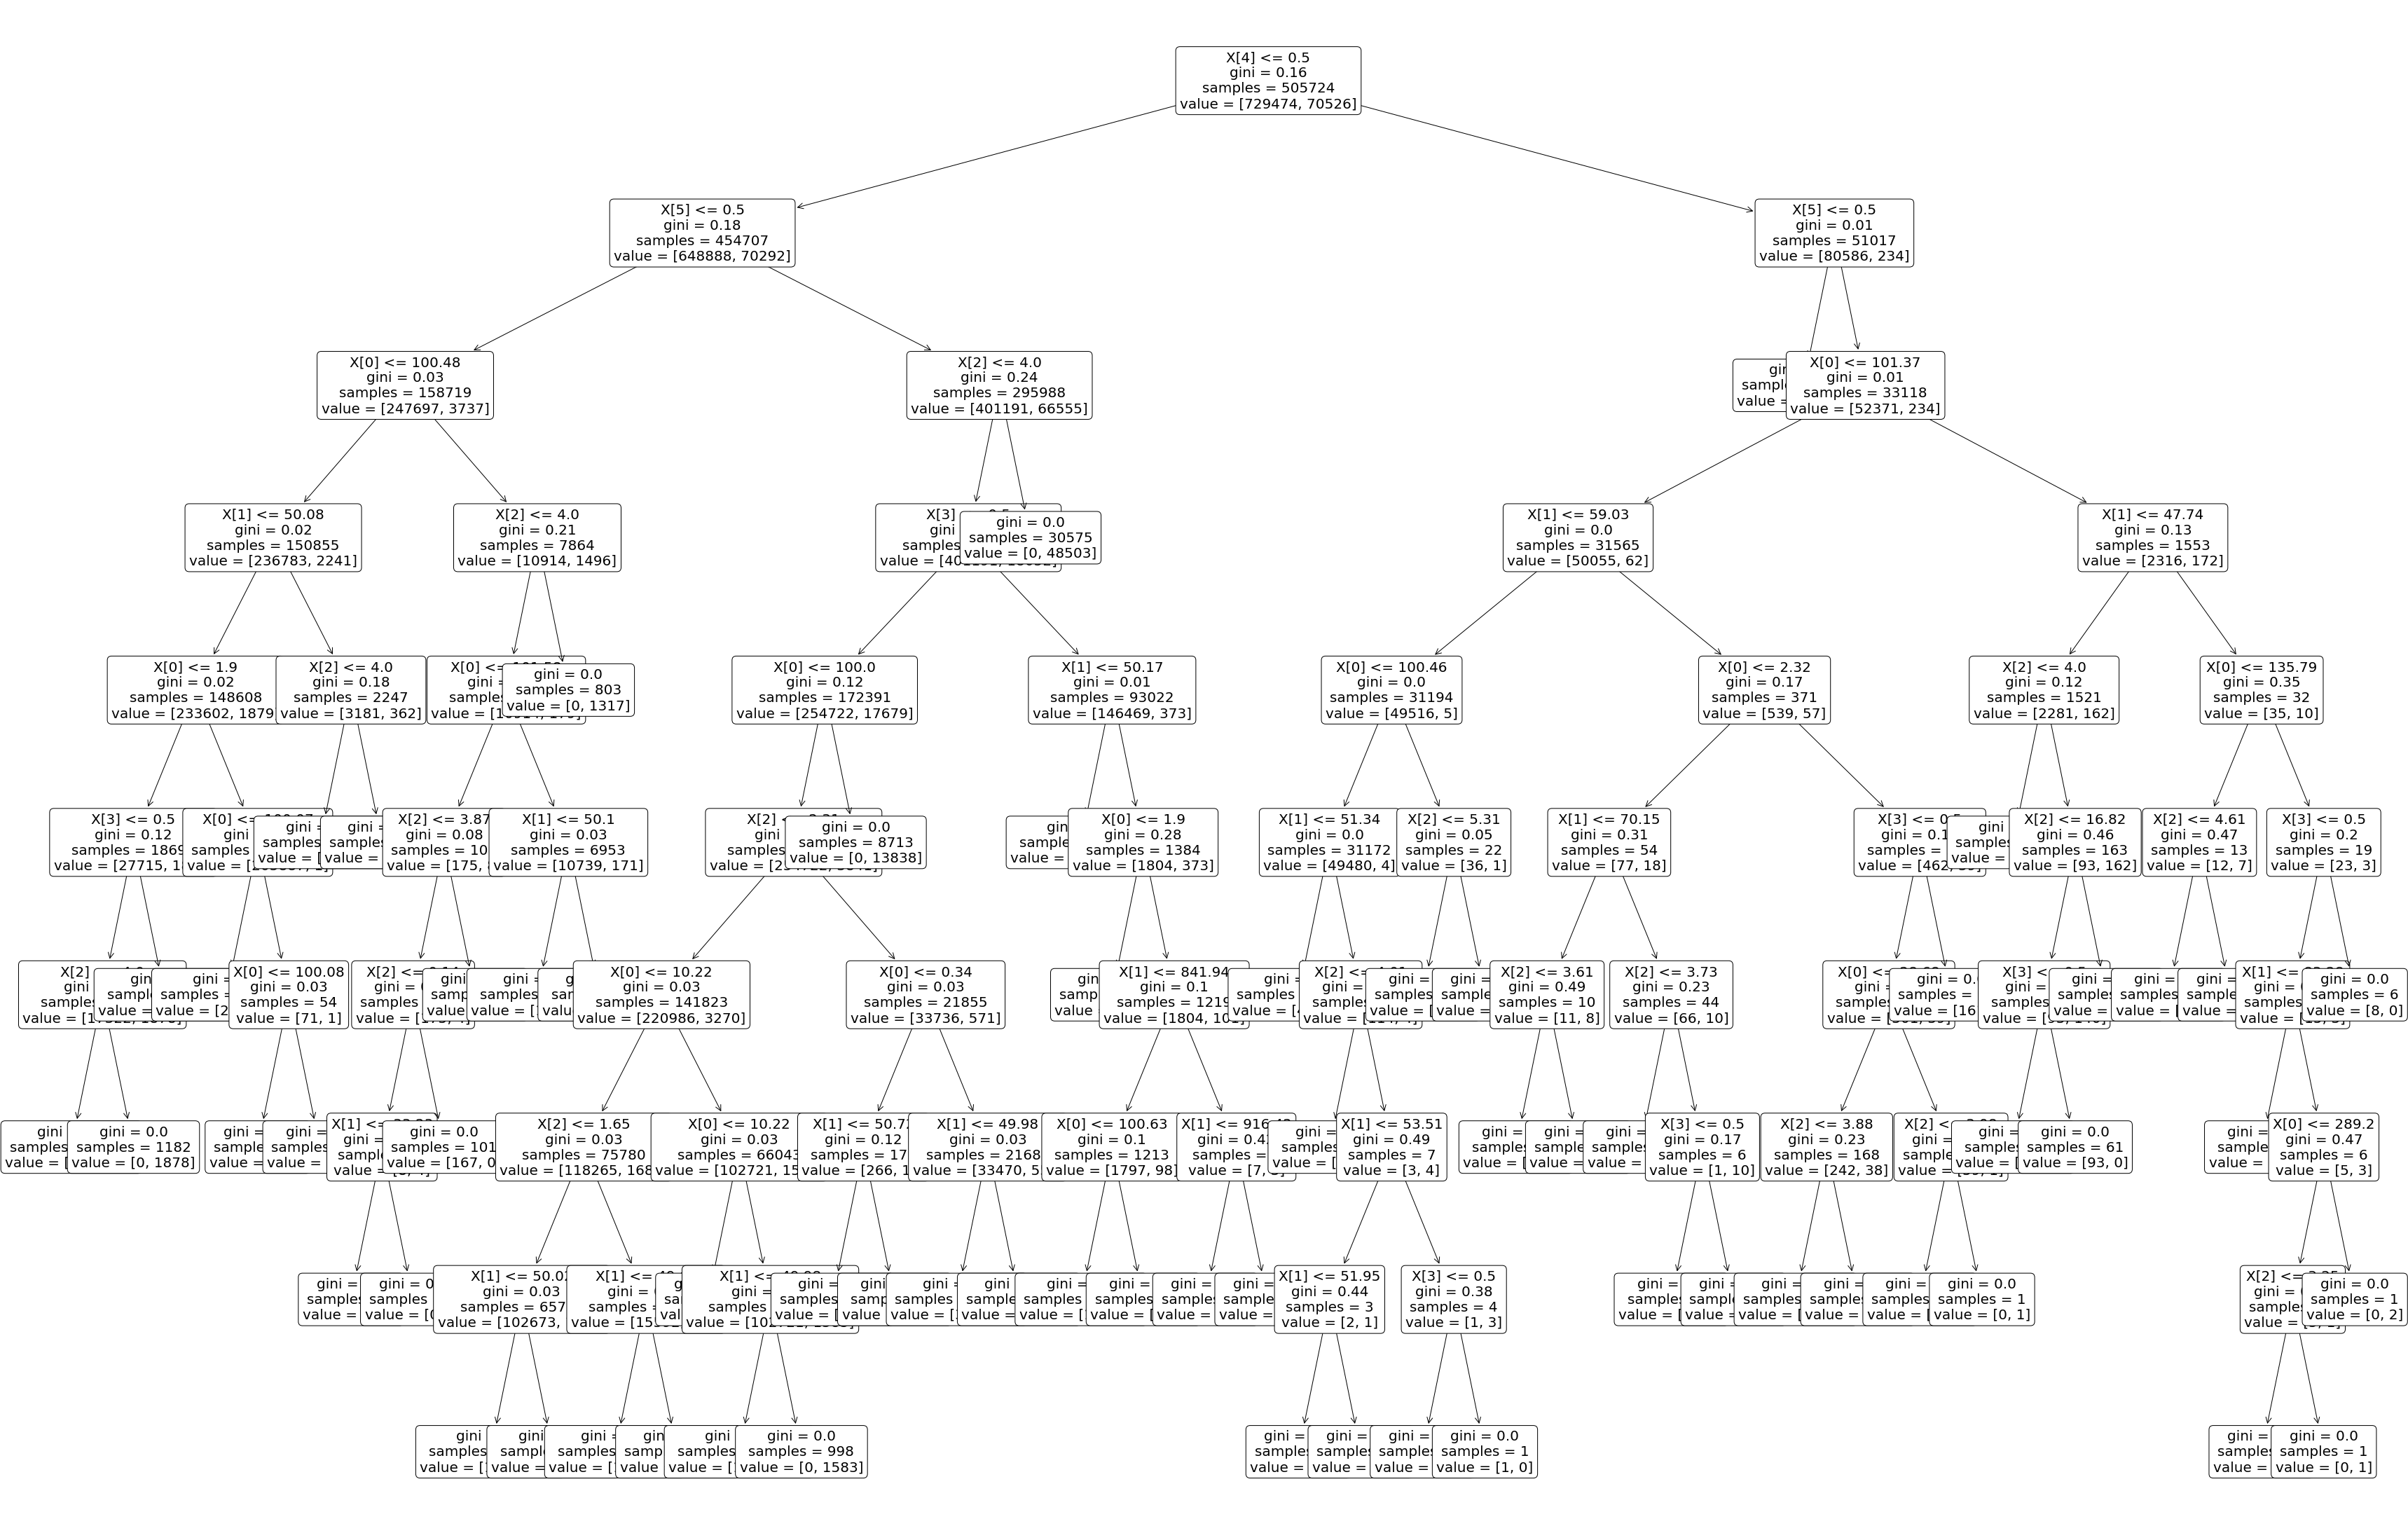

In [28]:
#Display a sample tree Structure in Random Forest
est = r_forest_model.estimators_[5]
plt.figure(figsize=[60,40])
tree.plot_tree(est,fontsize=20, rounded=True,impurity=True, precision=2)
plt.show()

Concluding Points:

> The classification machine learning models which we have created has accuracy above 90% - And particularly decision tree model and random forest model are providing good accuracy.
